In [51]:
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
from astropy.visualization import ZScaleInterval
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [52]:
#Abrimos los datos de los fits
img_b = fits.open('Img_B.fits')[0].data
img_v = fits.open('Img_V.fits')[0].data
hdr_b = fits.open('Img_B.fits')[0].header
hdr_v = fits.open('Img_V.fits')[0].header

In [53]:
#######Falta mover nsigma y npixels para detectar menos fuentes (sie es necesario)

#Threshold para detectar fuentes
threshold_b = detect_threshold(img_b, nsigma = 1.959)
threshold_v = detect_threshold(img_v, nsigma = 1)

#Detectamos fuentes
sour_b = detect_sources(img_b, threshold_b, npixels = 100)
sour_v = detect_sources(img_v, threshold_v, npixels = 90)

print(sour_b, sour_v)

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 128
labels: [  1   2   3   4   5 ... 124 125 126 127 128] <photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 149
labels: [  1   2   3   4   5 ... 145 146 147 148 149]


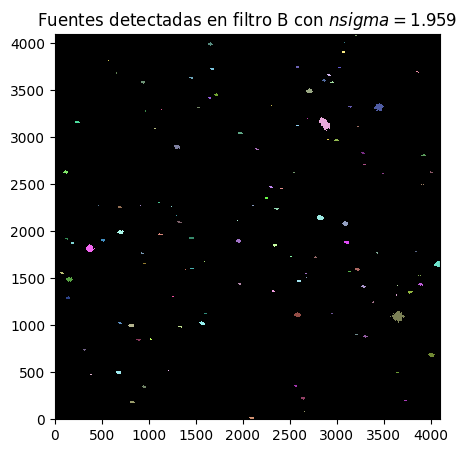

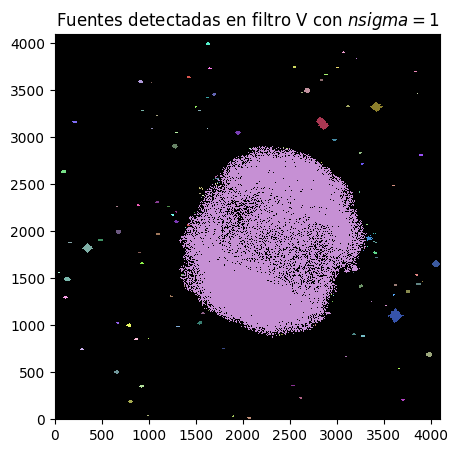

In [54]:
#Mapa de colores
cmap_sour_b = sour_b.make_cmap(seed=123)
cmap_sour_v = sour_v.make_cmap(seed=123)

#Graficamos fuentes
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_b, origin='lower', cmap=cmap_sour_b, interpolation='nearest')
plt.title('Fuentes detectadas en filtro B con $nsigma=1.959$')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_v, origin='lower', cmap=cmap_sour_v, interpolation='nearest')
plt.title('Fuentes detectadas en filtro V con $nsigma=1$')
plt.show()



In [55]:
#Separamos fuentes
deblend_b = deblend_sources(img_b, sour_b, npixels=5, nlevels=1, contrast=0)
deblend_v = deblend_sources(img_v, sour_v, npixels=1000, nlevels=1, contrast=0.5)

print(deblend_b, deblend_v)

#No cambia el numero de fuentes (weird) pero supongo que esta bien)

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 130
labels: [  1   2   3   4   5 ... 126 127 128 129 130] <photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 149
labels: [  1   2   3   4   5 ... 145 146 147 148 149]


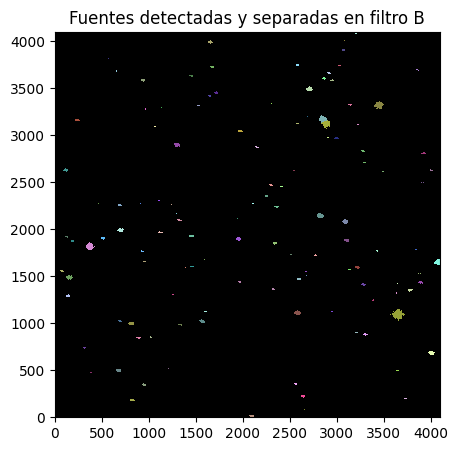

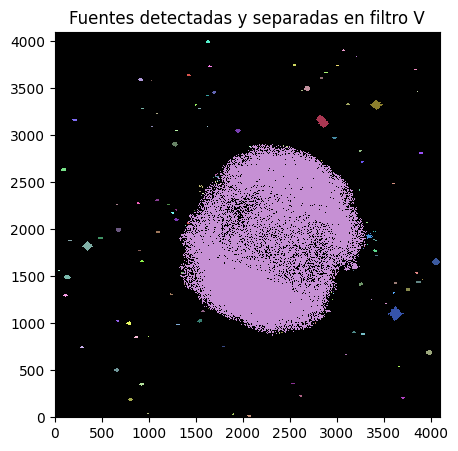

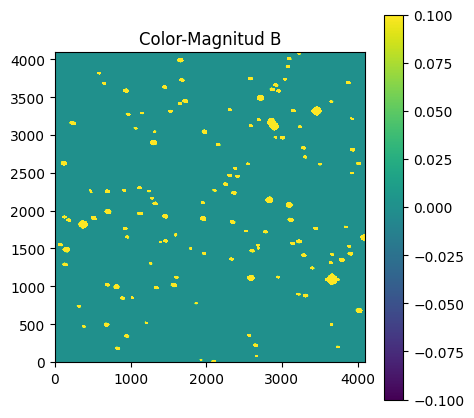

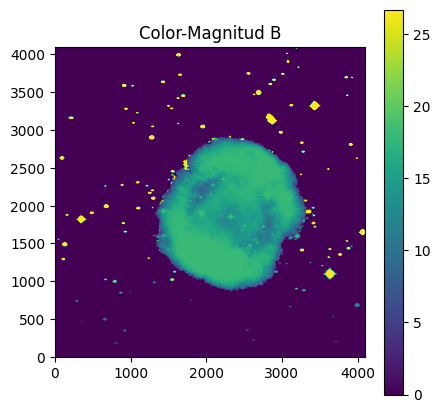

In [56]:
cmap_deblend_b = deblend_b.make_cmap(seed=123)
cmap_deblend_v = deblend_v.make_cmap(seed=123)

#Las vemos

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(deblend_b, origin='lower', cmap=cmap_deblend_b,interpolation='nearest')
plt.title('Fuentes detectadas y separadas en filtro B')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(deblend_v, origin='lower', cmap=cmap_deblend_v,interpolation='nearest')
plt.title('Fuentes detectadas y separadas en filtro V')
plt.show()







fig = plt.figure(figsize=(5,5))
zscale_v = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_v.get_limits(deblend_b)

plt.imshow(deblend_b,vmin=min_value,vmax=max_value,cmap='viridis',origin='lower')
plt.title('Color-Magnitud B')
plt.colorbar()

fig = plt.figure(figsize=(5,5))
zscale_v = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_v.get_limits(deblend_v)

plt.imshow(deblend_v,vmin=min_value,vmax=max_value,cmap='viridis',origin='lower')
plt.title('Color-Magnitud B')
plt.colorbar()


In [57]:
#Catalogo
cat_b = SourceCatalog(img_b, deblend_b)
cat_v = SourceCatalog(img_v, deblend_v)

#Tablas
tbl_b = cat_b.to_table()['label','xcentroid','ycentroid','area','segment_flux']
tbl_v = cat_v.to_table()['label','xcentroid','ycentroid','area','segment_flux']

#Printeo las tablas con los datos que me interesant no mas, sino queda demasiado grande
print(tbl_b, tbl_v)


label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- ------------------ ------------------ ------ ------------------
    1  2091.895338947584  9.476307693822978  937.0 180220.34198760986
    2 1923.1038216782702  28.58208187002876  159.0 18528.361770629883
    3 2655.5214590242663  78.30244578454798  106.0 13491.095108032227
    4  826.4270220411853 180.68157144229855  975.0 155108.27172088623
    5 3727.1928006299363 199.20732991633605  447.0   54893.2465133667
    6  2640.112128821013 221.66473161710175  900.0 139789.22387695312
    7  945.5845824680697 344.19904482974425 1058.0  186040.5931930542
    8  2558.115395981321  353.2581302940688  437.0   54683.5286026001
    9 380.67282886692954 469.22148511777283  237.0  26869.34996032715
  ...                ...                ...    ...                ...
  121 2573.9963861125134  3743.103148045228  650.0  89151.02619171143
  122  576.305619403

In [58]:
#Flujo real
tbl_b['segment_flux'] = tbl_b['segment_flux']/hdr_b['EXPTIME']
tbl_v['segment_flux'] = tbl_v['segment_flux']/hdr_v['EXPTIME']

print(tbl_b, tbl_v)

label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- ------------------ ------------------ ------ ------------------
    1  2091.895338947584  9.476307693822978  937.0 300.36723664601647
    2 1923.1038216782702  28.58208187002876  159.0 30.880602951049806
    3 2655.5214590242663  78.30244578454798  106.0 22.485158513387045
    4  826.4270220411853 180.68157144229855  975.0 258.51378620147705
    5 3727.1928006299363 199.20732991633605  447.0   91.4887441889445
    6  2640.112128821013 221.66473161710175  900.0  232.9820397949219
    7  945.5845824680697 344.19904482974425 1058.0   310.067655321757
    8  2558.115395981321  353.2581302940688  437.0  91.13921433766683
    9 380.67282886692954 469.22148511777283  237.0  44.78224993387858
  ...                ...                ...    ...                ...
  121 2573.9963861125134  3743.103148045228  650.0 148.58504365285236
  122  576.305619403

In [59]:
#Magnitudes con los zeropoint de la calibracion
zp_b = 35.386650289735286
zp_v = 33.62005757346041

tbl_b['magnitude'] = zp_b = 2.5 * np.log(tbl_b['segment_flux'])
tbl_v['magnitude'] = zp_v = 2.5 * np.log(tbl_v['segment_flux'])

print(tbl_b, tbl_v)

label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
----- ------------------ ... ------------------ ------------------
    1  2091.895338947584 ... 300.36723664601647  14.26251462045736
    2 1923.1038216782702 ... 30.880602951049806  8.575320626457128
    3 2655.5214590242663 ... 22.485158513387045  7.782138674842679
    4  826.4270220411853 ... 258.51378620147705 13.887372560150421
    5 3727.1928006299363 ...   91.4887441889445 11.290539875965294
    6  2640.112128821013 ...  232.9820397949219 13.627403420423674
    7  945.5845824680697 ...   310.067655321757 14.341976291602672
    8  2558.115395981321 ...  91.13921433766683 11.280970413521764
    9 380.67282886692954 ...  44.78224993387858  9.504529635193016
  ...                ... ...                ...                ...
  121 2573.9963861125134 ... 148.58504365285236 12.502893697131352
  122  576.3056194039666 ... 34.496441510518395  8.85214043523

In [60]:
print(np.sort(tbl_v['magnitude']),np.sort(tbl_b['magnitude']))

    magnitude     
------------------
  6.86759382767398
 6.902735086998112
 7.091298087493022
 7.102184598697917
 7.228481319928419
 7.230990572913236
 7.243983330805644
 7.251843269849446
7.2658904942045455
 7.279629855160485
               ...
20.397545633540393
21.065173657495386
21.310720655729618
21.416972062448206
23.978826845217604
 25.20036573757658
25.492760996622238
 25.68537055465122
26.615876386084146
32.829859561834944
Length = 149 rows     magnitude     
------------------
 6.800821681952565
 6.979230137000361
 7.549480236040511
 7.782138674842679
 7.794480923446182
 7.849092115117826
 7.875301202704685
 8.028822470198781
  8.08663066877045
 8.095268581083744
               ...
18.512313194550142
18.550990873215884
18.854191999728545
 19.78404154324227
 20.44037780780874
20.854516750349454
 21.88954649156804
22.135638556814555
22.675190964905237
24.417784609511312
Length = 130 rows


In [61]:
B_V = tbl_b['magnitude']-tbl_v['magnitude']

ValueError: operands could not be broadcast together with shapes (130,) (149,) 

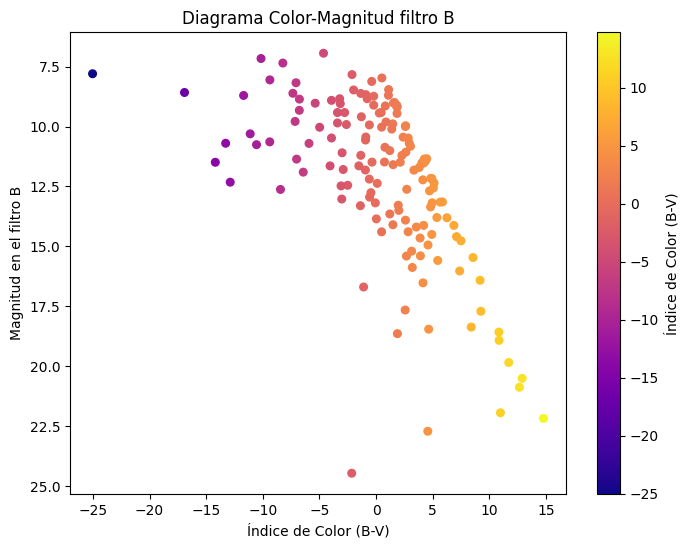

In [ ]:
# Crear el diagrama color-magnitud
plt.figure(figsize=(8, 6))
plt.scatter(B_V, tbl_b['magnitude'], c=B_V, cmap='plasma', s = 30)
plt.colorbar(label="Índice de Color (B-V)")
plt.gca().invert_yaxis()  # Invertir el eje y para que las magnitudes más brillantes estén arriba

# Añadir etiquetas
plt.xlabel("Índice de Color (B-V)")
plt.ylabel("Magnitud en el filtro B")
plt.title("Diagrama Color-Magnitud filtro B")

plt.show()

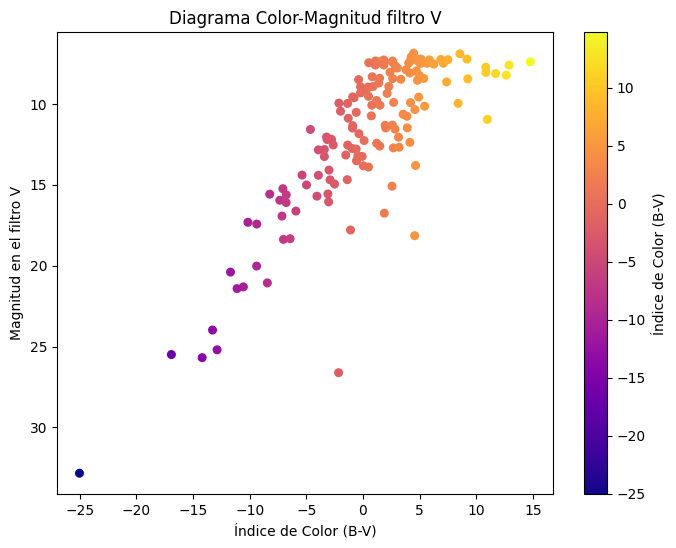

In [ ]:
# Crear el diagrama color-magnitud
plt.figure(figsize=(8, 6))
plt.scatter(B_V, tbl_v['magnitude'], c=B_V, cmap='plasma', s = 30)
plt.colorbar(label="Índice de Color (B-V)")
plt.gca().invert_yaxis()  # Invertir el eje y para que las magnitudes más brillantes estén arriba

# Añadir etiquetas
plt.xlabel("Índice de Color (B-V)")
plt.ylabel("Magnitud en el filtro V")
plt.title("Diagrama Color-Magnitud filtro V")

plt.show()